In [2]:
import os
# import drjit
gpu_num = 0 # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sionna
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
tf.get_logger().setLevel('ERROR')
import numpy as np
import pickle
import matplotlib.pyplot as plt
from jammer.utils import NonNegMaxMeanSquareNorm, MaxMeanSquareNorm, reduce_mean_power

In [9]:
# filenames = ["weights/presentation/ue_1_coded.pickle", "weights/presentation/ue_1_uncoded.pickle"]
filenames = []
num_ues = np.arange(1, 5, dtype=np.int32)
for num_ue in num_ues:
    filename = f"weights/nonneg_vs_neg/ue_{num_ue}_symbol.pickle"
    filenames.append(filename)

shape = [14, 1]

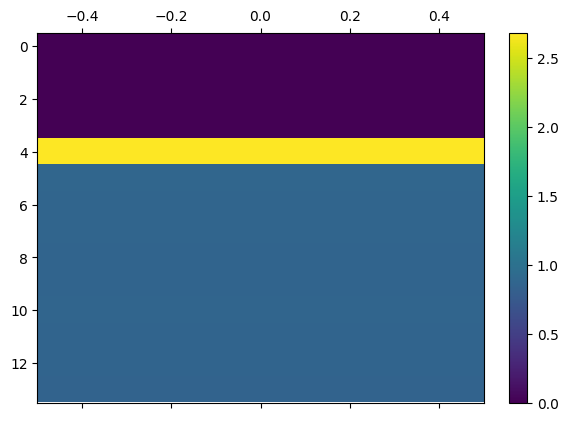

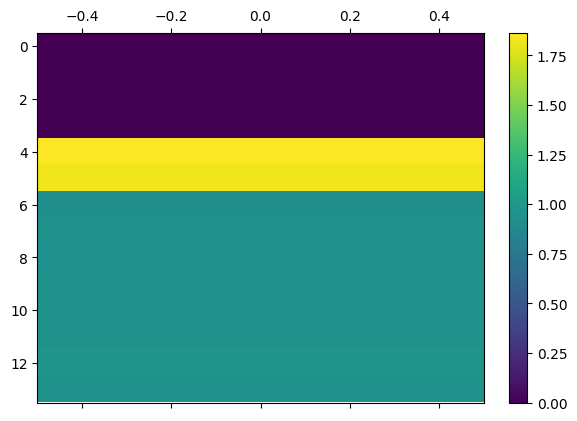

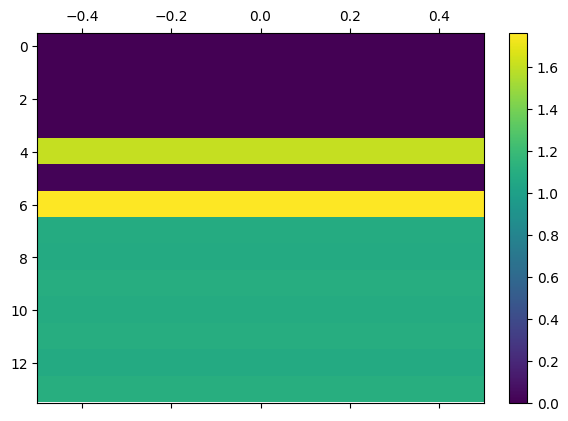

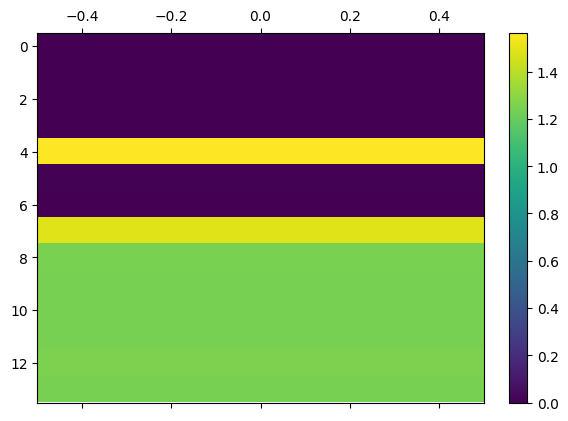

In [10]:
for filename in filenames:
    with open(filename, 'rb') as f:
        data = pickle.load(f)[0]
        data = np.reshape(data, shape)
        # weights are in domain MaxMeanSquareNorm, but we want to only see the absolute values
        data = MaxMeanSquareNorm()(data)
        fig, ax = plt.subplots()
        im = ax.matshow(np.abs(data), aspect='auto', vmin=0)
        # ax.set_title(filename)
        fig.colorbar(im, fraction=0.05)